In [5]:
import os
os.chdir('/home/roberto/Documents/Titulación/Tesina')
from scripts import *

### Países disponibles:

##### -España
##### -Alemania

### Años disponibles:

##### 2008 a 2017
### Métodos disponibles

solar_one_day(country,year,month,day)

correr_simulacion() para ejecutar simulación de nuevo

leer() leer como DataFrame la salida de la simulación

area_elegible(country, includer) para mapa cuadriculado del área a utilizar para paneles (Includer disponibles = dump y water)

tres_random(pais) para gráfica de tres días aleatorios de generación de energía

anual_country(pais) Generación anual por país. Regresa DF

suma_mes(country,mes) Regresa la producción total de un mes para cada año en un país (Regresa diccionario)

graficas_bienestar(country) Diagrama de caja y brazos para un país

produccion_por_mes(country) Producción por mes. Regresa la media y su estimación con intervalos de confianza al 95% (DataFrame)

ventas_spain() Regresa DataFrame con las ventas por cada mes de España

ventas_germany() Regresa DataFrame con las ventas por cada mes de Alemania

graficas_cuatrimestre(country) Gráficas por cuatrimestre. Perc.0.75, median y perc. 0.25

<AxesSubplot:>

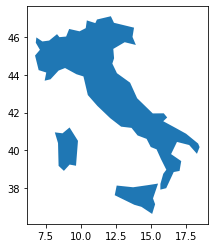

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
shapes = world[world.name.isin(['Italy'])].set_index('name')
shapes.plot()

<AxesSubplot:>

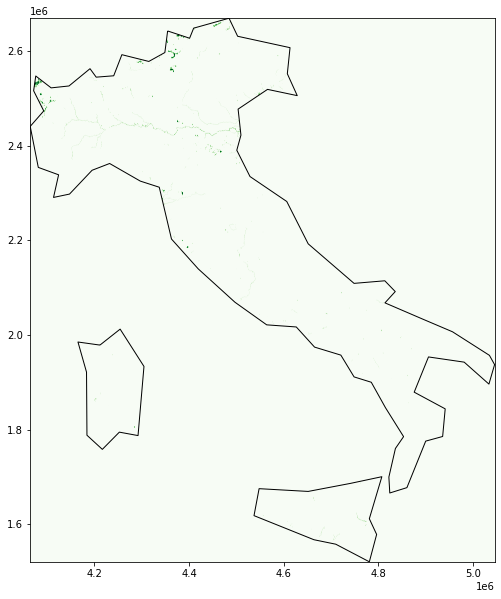

In [27]:
country = 'Italy'
includer = dump
os.chdir('/home/roberto/Documents/Titulación/Archivos')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = [country]
shapes = world[world.name.isin(countries)].set_index('name')
bounds = shapes.unary_union.buffer(1).bounds
name = country+".nc"
cutout = atlite.Cutout(name, module='era5', bounds=bounds, time=slice('2009-01-01','2010-01-01'))
CORINE = 'corine.tif'
excluder = ExclusionContainer()
excluder.add_raster(CORINE, codes=includer,invert=True)
pais = shapes.loc[[country]].geometry.to_crs(excluder.crs)
masked, transform = shape_availability(pais, excluder)
eligible_share = masked.sum() * excluder.res**2 / pais.geometry.item().area
fig, ax = plt.subplots(figsize=(15,10))
ax = show(masked, transform=transform, cmap='Greens', ax=ax)
pais.plot(ax=ax, edgecolor='k',color='None')

In [28]:
solar_one_day('Belgium',2011,4,11)

Compute availability matrix: 100%|██████████| 1/1 [00:00<00:00,  2.58 gridcells/s]
2022-08-11 22:22:55,659 INFO Requesting data for feature height...
2022-08-11 22:22:55,666 INFO Requesting data for feature influx...
2022-08-11 22:22:55,666 INFO Requesting data for feature wind...
2022-08-11 22:22:57,963 INFO CDS: Downloading variables
	 * geopotential (2011)

2022-08-11 22:23:02,107 INFO CDS: Downloading variables
	 * 100m_u_component_of_wind (2011)
	 * 100m_v_component_of_wind (2011)
	 * forecast_surface_roughness (2011)

2022-08-11 22:23:03,340 INFO CDS: Downloading variables
	 * 2m_temperature (2011)
	 * soil_temperature_level_4 (2011)

2022-08-11 22:23:04,566 INFO CDS: Downloading variables
	 * runoff (2011)

2022-08-11 22:23:04,970 INFO CDS: Downloading variables
	 * surface_net_solar_radiation (2011)
	 * surface_solar_radiation_downwards (2011)
	 * toa_incident_solar_radiation (2011)
	 * total_sky_direct_solar_radiation_at_surface (2011)



[########################################] | 100% Completed |  0.1s


2022-08-11 22:23:06,851 INFO Convert and aggregate 'pv'.


name,Belgium[MWh]
time,
2011-01-01 00:00:00,0.000000
2011-01-01 01:00:00,0.000000
2011-01-01 02:00:00,0.000000
2011-01-01 03:00:00,0.000000
2011-01-01 04:00:00,0.000000
2011-01-01 05:00:00,0.000000
2011-01-01 06:00:00,0.000000
2011-01-01 07:00:00,0.000000
2011-01-01 08:00:00,0.000000
